In [1]:
import pandas as pd
import re
import seaborn as sns
import os
import matplotlib.pyplot as plt
import requests
from lxml import html

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. The World Happiness Report 2020 for the first time ranks cities around the world by their subjective well-being and digs more deeply into how the social, urban and natural environments combine to affect our happiness.

https://www.kaggle.com/datasets/mathurinache/world-happiness-report?resource=download&select=2022.csv

https://datosmacro.expansion.com/ipc-paises


a136dfe125d4c622d671e5c904689ced    https://fredaccount.stlouisfed.org/apikey

In [2]:
def downloading(path):
    """This function downloads from a raw link and saves the dataframe locally.
    args:
    :url: string. the link
    :name: string. name to save the file
    """
    df=pd.read_csv(path, encoding='latin')
    return df
    pass

In [3]:
df=pd.read_csv('data/happiness-2015.csv', encoding='latin')
df2016=pd.read_csv('data/happiness-2016.csv', encoding='latin')
df2017=pd.read_csv('data/happiness-2017.csv', encoding='latin')
df2018=pd.read_csv('data/happiness-2018.csv', encoding='latin')
df2019=pd.read_csv('data/happiness-2019.csv', encoding='latin')
df2020=pd.read_csv('data/happiness-2020.csv', encoding='latin')
df2021=pd.read_csv('data/happiness-2021.csv', encoding='latin')
df2022=pd.read_csv('data/happiness-2022.csv', encoding='latin')

In [4]:
df.sample()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
16,Luxembourg,Western Europe,17,6.946,0.03499,1.56391,1.21963,0.91894,0.61583,0.37798,0.28034,1.96961


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [6]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_average_yearly_temperature'

In [7]:
headers = {"User-agent": 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'}
res = requests.get(url, headers=headers)

In [8]:
print(res)

<Response [200]>


In [9]:
table = pd.read_html(res.content, encoding = 'utf8')

In [10]:
df2 = table[0]

In [11]:
df2.sample()

,Country,Average yearly temperature (1961–1990 Celsius)
4,Maldives,28.00


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 2 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Country                                         192 non-null    object
 1   Average yearly temperature (1961–1990 Celsius)  192 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB


In [13]:
df2.describe()

,Country,Average yearly temperature (1961–1990 Celsius)
count,192,192
unique,192,152
top,Burkina Faso,27.15
freq,1,5


In [14]:
df_countries = list(df['Country'].values)
print(df_countries)

['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland', 'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel', 'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil', 'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates', 'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama', 'Germany', 'Chile', 'Qatar', 'France', 'Argentina', 'Czech Republic', 'Uruguay', 'Colombia', 'Thailand', 'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname', 'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan', 'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy', 'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia', 'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia', 'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus', 'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong', 'Estonia', 'Indonesia', 'Vietnam', 'Turkey', 'Kyrgyzstan', 'Nigeria', 'Bhutan', 'Azerbaijan', 'Pakistan', 'Jordan', 'Montene

In [15]:
df2_countries = list(df2['Country'].values)

In [16]:
df_remaining_countries=[]
df2_remaining_countries=[]

for i in df_countries:
    if i not in df2_countries:
        df_remaining_countries.append(i)
        
for i in df2_countries:
    if i not in df_countries:
        df2_remaining_countries.append(i)
        
print(df_remaining_countries)

['Denmark', 'Norway', 'Taiwan', 'North Cyprus', 'Kosovo', 'Somaliland region', 'Macedonia', 'Swaziland', 'Palestinian Territories', 'Congo (Kinshasa)', 'Congo (Brazzaville)']


In [17]:
print(df2_remaining_countries)

['Kiribati', 'Maldives', 'Tuvalu', 'Palau', 'Gambia', 'Marshall Islands', 'Seychelles', 'Somalia', 'Brunei', 'Saint Vincent and the Grenadines', 'Guinea-Bissau', 'Samoa', 'Grenada', 'Barbados', 'Guyana', 'Federated States of Micronesia', 'Antigua and Barbuda', 'Solomon Islands', 'Eritrea', 'Saint Lucia', 'Belize', 'Timor-Leste', 'Papua New Guinea', 'Tonga', 'Cuba', 'Bahamas', 'Republic of the Congo', 'Equatorial Guinea', 'Saint Kitts and Nevis', 'Fiji', 'Democratic Republic of the Congo', 'Vanuatu', 'São Tomé and Príncipe', 'Cape Verde', 'Dominica', 'Eswatini', 'Namibia', 'Monaco', 'San Marino', 'North Macedonia', 'Andorra', 'Liechtenstein', 'North Korea', 'Norway [note 1]', 'Denmark [note 2]']


In [18]:
mask_Denmark = df2['Country'].str.contains('Denmark', case=False)

df2.loc[mask_Denmark, 'Country'] = 'Denmark'

In [19]:
mask_Norway = df2['Country'].str.contains('Norway', case=False)
df2.loc[mask_Norway, 'Country'] = 'Norway'

In [20]:
mask_Somaliland = df2['Country'].str.contains('Somalia', case=False)
df2.loc[mask_Somaliland, 'Country'] = 'Somaliland region'

In [21]:
mask_Macedonia = df2['Country'].str.contains('Macedonia', case=False)
df2.loc[mask_Macedonia, 'Country'] = 'Macedonia'

In [22]:
mask_Swaziland = df2['Country'].str.contains('Eswatini', case=False)
df2.loc[mask_Swaziland, 'Country'] = 'Swaziland'

In [23]:
mask_Democratic = df['Country'].str.contains('Kinshasa', case=False)
df.loc[mask_Democratic, 'Country'] = 'Democratic Republic of the Congo'

In [24]:
mask_Congo = df['Country'].str.contains('Brazzaville', case=False)
df.loc[mask_Congo, 'Country'] = 'Republic of the Congo'

In [25]:
df2_countries = list(df2['Country'].values)
df_countries = list(df['Country'].values)

In [26]:
df_remaining_countries=[]
df2_remaining_countries=[]

for i in df_countries:
    if i not in df2_countries:
        df_remaining_countries.append(i)
        
for i in df2_countries:
    if i not in df_countries:
        df2_remaining_countries.append(i)
        
print(df_remaining_countries)

['Taiwan', 'North Cyprus', 'Kosovo', 'Palestinian Territories']


In [27]:
df = pd.merge(df, df2, on='Country', how='inner')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Average yearly temperature (1961–1990 Celsius)
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,05.10
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,−0.70
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,−3.70
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,01.50
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,−5.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,17.85
150,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,27.55
151,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,17.75
152,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,19.80


In [28]:
pd.isna(df).sum()

Country                                           0
Region                                            0
Happiness Rank                                    0
Happiness Score                                   0
Standard Error                                    0
Economy (GDP per Capita)                          0
Family                                            0
Health (Life Expectancy)                          0
Freedom                                           0
Trust (Government Corruption)                     0
Generosity                                        0
Dystopia Residual                                 0
Average yearly temperature (1961–1990 Celsius)    0
dtype: int64

In [29]:
df = df.add_suffix(' 2015')
df.sample()

,Country 2015,Region 2015,Happiness Rank 2015,Happiness Score 2015,Standard Error 2015,Economy (GDP per Capita) 2015,Family 2015,Health (Life Expectancy) 2015,Freedom 2015,Trust (Government Corruption) 2015,Generosity 2015,Dystopia Residual 2015,Average yearly temperature (1961–1990 Celsius) 2015
92,Bosnia and Herzegovina,Central and Eastern Europe,96,4.949,0.06913,0.83223,0.91916,0.79081,0.09245,0.00227,0.24808,2.06367,09.85


In [30]:
df.rename(columns = {"Economy (GDP per Capita) 2015":"GDP per Capita 2015" , "Average yearly temperature (1961–1990 Celsius) 2015": "Average yearly temperature", "Country 2015": "Country", "Region 2015": "Region"}, inplace=True)

In [31]:
df

,Country,Region,Happiness Rank 2015,Happiness Score 2015,Standard Error 2015,GDP per Capita 2015,Family 2015,Health (Life Expectancy) 2015,Freedom 2015,Trust (Government Corruption) 2015,Generosity 2015,Dystopia Residual 2015,Average yearly temperature
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,05.10
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,−0.70
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,−3.70
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,01.50
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,−5.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,17.85
150,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,27.55
151,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,17.75
152,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,19.80


In [32]:
df2019

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [33]:
df2019 = df2019.add_suffix(' 2019')

In [34]:
df2019.rename(columns = {"Country or region 2019" : "Country", "Overall rank 2019":"Happiness Rank 2019", "Score 2019": "Happiness Score 2019" }, inplace=True)

In [35]:
df2019

,Happiness Rank 2019,Country,Happiness Score 2019,GDP per capita 2019,Social support 2019,Healthy life expectancy 2019,Freedom to make life choices 2019,Generosity 2019,Perceptions of corruption 2019
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [36]:
df2019_countries = list(df2019['Country'].values)
df_countries = list(df['Country'].values)

In [37]:
df_remaining_countries=[]
df2019_remaining_countries=[]

for i in df_countries:
    if i not in df2019_countries:
        df_remaining_countries.append(i)
        
for i in df2019_countries:
    if i not in df_countries:
        df2019_remaining_countries.append(i)
        
print(df_remaining_countries)

['Oman', 'Suriname', 'Trinidad and Tobago', 'Somaliland region', 'Macedonia', 'Sudan', 'Democratic Republic of the Congo', 'Djibouti', 'Angola', 'Republic of the Congo']


In [38]:
print(df2019_remaining_countries)

['Taiwan', 'Trinidad & Tobago', 'Kosovo', 'Northern Cyprus', 'North Macedonia', 'Congo (Brazzaville)', 'Palestinian Territories', 'Somalia', 'Namibia', 'Gambia', 'Congo (Kinshasa)', 'South Sudan']


mask_Cyprus = df2019['Country'].str.contains('Northern Cyprus', case=False)
df2019.loc[mask_Cyprus, 'Country'] = 'North Cyprus'

In [39]:
mask_Congo = df2019['Country'].str.contains('Brazzaville', case=False)
df2019.loc[mask_Congo, 'Country'] = 'Republic of the Congo'

In [40]:
mask_Democratic = df2019['Country'].str.contains('Kinshasa', case=False)
df2019.loc[mask_Democratic, 'Country'] = 'Democratic Republic of the Congo'

In [41]:
mask_Trinidad = df2019['Country'].str.contains('Trinidad & Tobago', case=False)
df2019.loc[mask_Trinidad, 'Country'] = 'Trinidad and Tobago'

In [42]:
mask_Macedonia = df2019['Country'].str.contains('Macedonia', case=False)
df2019.loc[mask_Macedonia, 'Country'] = 'Macedonia'

In [43]:
mask_Somaliland = df2019['Country'].str.contains('Somalia', case=False)
df2019.loc[mask_Somaliland, 'Country'] = 'Somaliland region'

In [44]:
df2017.sample()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
50,Japan,51,5.92,5.990719,5.849281,1.416915,1.436338,0.913476,0.505626,0.120573,0.163761,1.363224


In [45]:
df2017 = df2017.add_suffix(' 2017')

In [46]:
df2017.rename(columns = {"Country 2017" : "Country", "Happiness.Rank 2017" :"Happiness Rank 2017", "Happiness.Score 2017" : "Happiness Score 2017", "Economy..GDP.per.Capita. 2017": "GDP per Capita 2017"}, inplace=True)

In [47]:
df2017_countries = list(df2017['Country'].values)
df_countries = list(df['Country'].values)

In [48]:
df_remaining_countries=[]
df2017_remaining_countries=[]

for i in df_countries:
    if i not in df2017_countries:
        df_remaining_countries.append(i)
        
for i in df2017_countries:
    if i not in df_countries:
        df2017_remaining_countries.append(i)
        
print(df_remaining_countries)

['Oman', 'Suriname', 'Hong Kong', 'Somaliland region', 'Laos', 'Swaziland', 'Democratic Republic of the Congo', 'Djibouti', 'Republic of the Congo', 'Comoros']


In [49]:
print(df2017_remaining_countries)

['Taiwan Province of China', 'Belize', 'North Cyprus', 'Hong Kong S.A.R., China', 'Kosovo', 'Somalia', 'Palestinian Territories', 'Namibia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'South Sudan']


In [50]:
mask_Taiwan = df2017['Country'].str.contains('Taiwan', case=False)
df2017.loc[mask_Taiwan, 'Country'] = 'Taiwan'

In [51]:
mask_HongKong = df2017['Country'].str.contains('Hong Kong', case=False)
df2017.loc[mask_HongKong, 'Country'] = 'Hong Kong'

In [52]:
mask_Democratic = df2017['Country'].str.contains('Kinshasa', case=False)
df2017.loc[mask_Democratic, 'Country'] = 'Democratic Republic of the Congo'

In [53]:
mask_Congo = df2017['Country'].str.contains('Brazzaville', case=False)
df2017.loc[mask_Congo, 'Country'] = 'Republic of the Congo'

In [54]:
df2021.sample()

,ï»¿Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
19,Belgium,Western Europe,6.834,0.034,6.901,6.767,10.823,0.906,72.199,0.783,-0.153,0.646,2.43,1.463,0.998,0.747,0.489,0.088,0.187,2.862


In [55]:
df2021 = df2021.add_suffix(' 2021')

In [56]:
df2021.columns

Index(['ï»¿Country name 2021', 'Regional indicator 2021', 'Ladder score 2021',
       'Standard error of ladder score 2021', 'upperwhisker 2021',
       'lowerwhisker 2021', 'Logged GDP per capita 2021',
       'Social support 2021', 'Healthy life expectancy 2021',
       'Freedom to make life choices 2021', 'Generosity 2021',
       'Perceptions of corruption 2021', 'Ladder score in Dystopia 2021',
       'Explained by: Log GDP per capita 2021',
       'Explained by: Social support 2021',
       'Explained by: Healthy life expectancy 2021',
       'Explained by: Freedom to make life choices 2021',
       'Explained by: Generosity 2021',
       'Explained by: Perceptions of corruption 2021',
       'Dystopia + residual 2021'],
      dtype='object')

In [57]:
df2021.rename(columns = {"ï»¿Country name 2021" : "Country", "Ladder score 2021": "Happiness score 2021", "Explained by: Log GDP per capita 2021":"GDP per Capita 2021"}, inplace=True)

In [58]:
df2021_countries = list(df2021['Country'].values)
df_countries = list(df['Country'].values)

In [59]:
df_remaining_countries=[]
df2021_remaining_countries=[]

for i in df_countries:
    if i not in df2021_countries:
        df_remaining_countries.append(i)
        
for i in df2021_countries:
    if i not in df_countries:
        df2021_remaining_countries.append(i)
        
print(df_remaining_countries)

['Oman', 'Qatar', 'Suriname', 'Trinidad and Tobago', 'Hong Kong', 'Bhutan', 'Somaliland region', 'Macedonia', 'Sudan', 'Democratic Republic of the Congo', 'Djibouti', 'Angola', 'Republic of the Congo', 'Central African Republic', 'Syria']


In [60]:
print(df2021_remaining_countries)

['Taiwan Province of China', 'Kosovo', 'North Cyprus', 'Hong Kong S.A.R. of China', 'Congo (Brazzaville)', 'Maldives', 'North Macedonia', 'Gambia', 'Namibia', 'Palestinian Territories']


In [61]:
mask_Taiwan = df2021['Country'].str.contains('Taiwan', case=False)
df2021.loc[mask_Taiwan, 'Country'] = 'Taiwan'

In [62]:
mask_Congo = df2021['Country'].str.contains('Brazzaville', case=False)
df2021.loc[mask_Congo, 'Country'] = 'Republic of the Congo'

In [63]:
mask_HongKong = df2021['Country'].str.contains('Hong Kong', case=False)
df2021.loc[mask_HongKong, 'Country'] = 'Hong Kong'

In [64]:
mask_Macedonia = df2021['Country'].str.contains('Macedonia', case=False)
df2021.loc[mask_Macedonia, 'Country'] = 'Macedonia'

In [65]:
df.drop(columns=["Region", "Standard Error 2015", "Family 2015", "Health (Life Expectancy) 2015", "Freedom 2015", "Trust (Government Corruption) 2015", "Generosity 2015", "Dystopia Residual 2015"], axis=1, inplace=True)

In [66]:
df.head()

,Country,Happiness Rank 2015,Happiness Score 2015,GDP per Capita 2015,Average yearly temperature
0,Switzerland,1,7.587,1.39651,05.10
1,Iceland,2,7.561,1.30232,−0.70
2,Denmark,3,7.527,1.32548,−3.70
3,Norway,4,7.522,1.45900,01.50
4,Canada,5,7.427,1.32629,−5.10


In [67]:
df2017.drop(columns=["Whisker.high 2017", "Whisker.low 2017", "Family 2017", "Health..Life.Expectancy. 2017", "Freedom 2017", "Generosity 2017", "Trust..Government.Corruption. 2017", "Dystopia.Residual 2017"], axis=1, inplace=True)

In [68]:
df2017.head()

,Country,Happiness Rank 2017,Happiness Score 2017,GDP per Capita 2017
0,Norway,1,7.537,1.616463
1,Denmark,2,7.522,1.482383
2,Iceland,3,7.504,1.480633
3,Switzerland,4,7.494,1.564980
4,Finland,5,7.469,1.443572


In [69]:
df2019.drop(columns=["Social support 2019", "Freedom to make life choices 2019", "Generosity 2019", "Perceptions of corruption 2019","Healthy life expectancy 2019"], axis=1, inplace=True)

In [70]:
df2019.head()

,Happiness Rank 2019,Country,Happiness Score 2019,GDP per capita 2019
0,1,Finland,7.769,1.340
1,2,Denmark,7.600,1.383
2,3,Norway,7.554,1.488
3,4,Iceland,7.494,1.380
4,5,Netherlands,7.488,1.396


In [71]:
df2021.drop(columns=["Regional indicator 2021", "Standard error of ladder score 2021", "upperwhisker 2021", "lowerwhisker 2021","Social support 2021","Healthy life expectancy 2021", "Freedom to make life choices 2021", "Generosity 2021", "Perceptions of corruption 2021", "Ladder score in Dystopia 2021", "Explained by: Social support 2021", "Explained by: Healthy life expectancy 2021", "Explained by: Perceptions of corruption 2021", "Dystopia + residual 2021" ], axis=1, inplace=True)

In [72]:
df2021.drop(columns=["Explained by: Generosity 2021", "Explained by: Freedom to make life choices 2021","Logged GDP per capita 2021" ], axis=1, inplace=True)

In [73]:
df2021.sample()

,Country,Happiness score 2021,GDP per Capita 2021
109,Ukraine,4.875,0.979


In [74]:
df2021['Happiness rank 2021'] = df2021['Happiness score 2021'].rank(method='dense', ascending=False).astype(int)

In [75]:
df2021.head()

,Country,Happiness score 2021,GDP per Capita 2021,Happiness rank 2021
0,Finland,7.842,1.446,1
1,Denmark,7.620,1.502,2
2,Switzerland,7.571,1.566,3
3,Iceland,7.554,1.482,4
4,Netherlands,7.464,1.501,5


In [76]:
merged_df = pd.merge(df, df2017, on='Country')

In [77]:
merged_df2 = pd.merge(merged_df, df2019, on='Country')

In [78]:
merged_df3 = pd.merge(merged_df2, df2021, on='Country')

In [79]:
df=merged_df3
df

,Country,Happiness Rank 2015,Happiness Score 2015,GDP per Capita 2015,Average yearly temperature,Happiness Rank 2017,Happiness Score 2017,GDP per Capita 2017,Happiness Rank 2019,Happiness Score 2019,GDP per capita 2019,Happiness score 2021,GDP per Capita 2021,Happiness rank 2021
0,Switzerland,1,7.587,1.39651,05.10,4,7.494,1.564980,6,7.480,1.452,7.571,1.566,3
1,Iceland,2,7.561,1.30232,−0.70,3,7.504,1.480633,4,7.494,1.380,7.554,1.482,4
2,Denmark,3,7.527,1.32548,−3.70,2,7.522,1.482383,2,7.600,1.383,7.620,1.502,2
3,Norway,4,7.522,1.45900,01.50,1,7.537,1.616463,3,7.554,1.488,7.392,1.543,6
4,Canada,5,7.427,1.32629,−5.10,7,7.316,1.479204,9,7.278,1.365,7.103,1.447,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Afghanistan,153,3.575,0.31982,12.60,141,3.794,0.401477,154,3.203,0.350,2.523,0.370,147
135,Rwanda,154,3.465,0.22208,17.85,151,3.471,0.368746,152,3.334,0.359,3.415,0.364,145
136,Benin,155,3.340,0.28665,27.55,143,3.657,0.431085,102,4.883,0.393,5.045,0.507,97
137,Burundi,157,2.905,0.01530,19.80,154,2.905,0.091623,145,3.775,0.046,3.775,0.000,138


In [80]:
df_rank=df[["Country", "Happiness Rank 2015", "Happiness Rank 2017", "Happiness Rank 2019","Happiness rank 2021"]]

In [81]:
df_score=df[['Country', 'Happiness Score 2015', 'Happiness Score 2017', 'Happiness Score 2019', 'Happiness score 2021']]
df_score.sample()

,Country,Happiness Score 2015,Happiness Score 2017,Happiness Score 2019,Happiness score 2021
47,Paraguay,5.878,5.493,5.743,5.653


In [82]:
df_mean = df_score.loc[:, ['Happiness Score 2015', 'Happiness Score 2017', 'Happiness Score 2019', 'Happiness score 2021']].mean(axis=1).round(3)

In [83]:
df_score["Mean score"]= df_mean

C:\Users\pagob\AppData\Local\Temp\ipykernel_17564\778501913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score["Mean score"]= df_mean


In [84]:
df_score

,Country,Happiness Score 2015,Happiness Score 2017,Happiness Score 2019,Happiness score 2021,Mean score
0,Switzerland,7.587,7.494,7.480,7.571,7.533
1,Iceland,7.561,7.504,7.494,7.554,7.528
2,Denmark,7.527,7.522,7.600,7.620,7.567
3,Norway,7.522,7.537,7.554,7.392,7.501
4,Canada,7.427,7.316,7.278,7.103,7.281
...,...,...,...,...,...,...
134,Afghanistan,3.575,3.794,3.203,2.523,3.274
135,Rwanda,3.465,3.471,3.334,3.415,3.421
136,Benin,3.340,3.657,4.883,5.045,4.231
137,Burundi,2.905,2.905,3.775,3.775,3.340


In [85]:
df_score['Mean Rank'] = df_score['Mean score'].rank(method='dense', ascending=False).astype(int)

C:\Users\pagob\AppData\Local\Temp\ipykernel_17564\1695127547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score['Mean Rank'] = df_score['Mean score'].rank(method='dense', ascending=False).astype(int)


In [86]:
df_score

,Country,Happiness Score 2015,Happiness Score 2017,Happiness Score 2019,Happiness score 2021,Mean score,Mean Rank
0,Switzerland,7.587,7.494,7.480,7.571,7.533,3
1,Iceland,7.561,7.504,7.494,7.554,7.528,4
2,Denmark,7.527,7.522,7.600,7.620,7.567,2
3,Norway,7.522,7.537,7.554,7.392,7.501,5
4,Canada,7.427,7.316,7.278,7.103,7.281,9
...,...,...,...,...,...,...,...
134,Afghanistan,3.575,3.794,3.203,2.523,3.274,139
135,Rwanda,3.465,3.471,3.334,3.415,3.421,137
136,Benin,3.340,3.657,4.883,5.045,4.231,122
137,Burundi,2.905,2.905,3.775,3.775,3.340,138


In [87]:
df_score = df_score.sort_values("Mean Rank", ascending=True)

In [89]:
df_score = df_score.set_index("Mean Rank")

In [91]:
df_mean_score = df_score[["Country", "Mean score"]]

In [92]:
df_mean_score

,Country,Mean score
Mean Rank,,
1,Finland,7.621
2,Denmark,7.567
3,Switzerland,7.533
4,Iceland,7.528
5,Norway,7.501
...,...,...
135,Togo,3.631
136,Tanzania,3.496
137,Rwanda,3.421


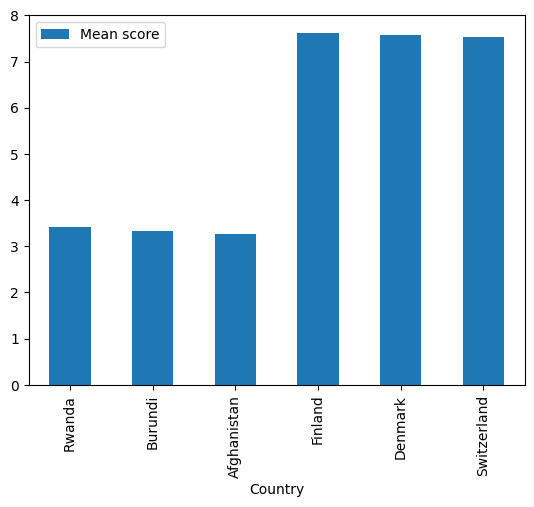

In [96]:
top_5 = df_mean_score.tail(3)
bottom_5 = df_mean_score.head(3)
top_bottom = pd.concat([top_5, bottom_5])

top_bottom.plot(x="Country", y="Mean score", kind="bar")
plt.show()